In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
bike_df=pd.read_csv("E:\\Learnings\\AI_ML\\MachineLearning\\bike_lending_case_study\\day.csv")

In [15]:
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [12]:
#bike_df.info()
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [72]:
mnth_names={'mnth':{1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
           ,'weathersit':{1: 'Clear',2:'Mist',3:'Snow',4:'Rain'}
            ,'season':{1:'spring', 2:'summer', 3:'fall', 4:'winter'}
           ,'weekday':{0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}}
bike_df=bike_df.replace(mnth_names)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


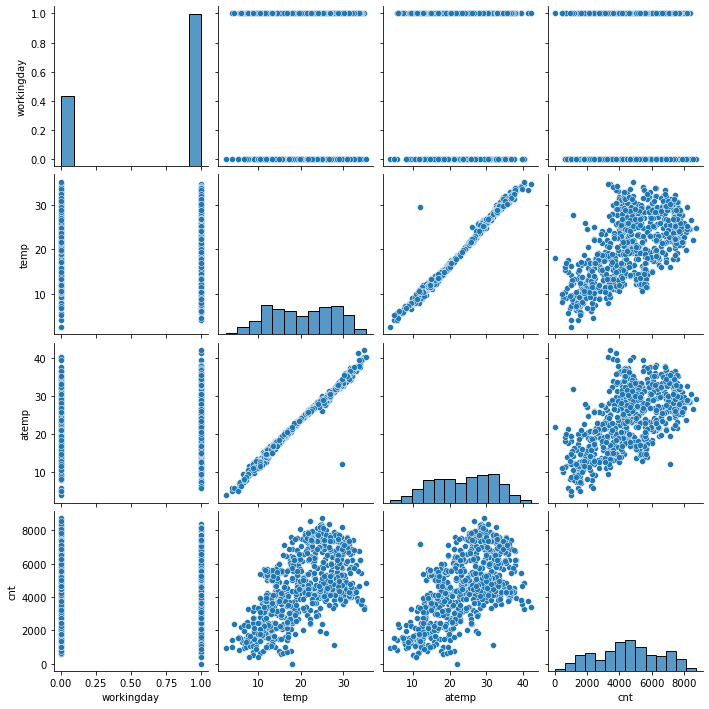

In [50]:
sns.pairplot(bike_df[['season','mnth','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']])
plt.show()

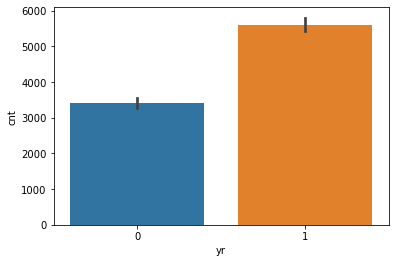

In [22]:
sns.barplot(data=bike_df,x=bike_df.yr,y=bike_df.cnt)
plt.show()

# Creating Dummy variables

In [73]:
mnth_dummy = pd.get_dummies(bike_df['mnth'],drop_first=True)
weather_dummy = pd.get_dummies(bike_df['weathersit'],drop_first=True)
season_dummy = pd.get_dummies(bike_df['season'],drop_first=True)
weekday_dummy = pd.get_dummies(bike_df['weekday'],drop_first=True)

In [74]:
#concat dummy variables with original dataframe
bike_df = pd.concat([bike_df,mnth_dummy,weather_dummy,season_dummy,weekday_dummy],axis=1)

In [75]:
#dropping redundant variable
bike_df=bike_df.drop(['instant','mnth','weathersit','season','weekday','instant','dteday','casual','registered'],axis=1)

# Create Test and Train data set

In [141]:
import sklearn
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(bike_df,train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


# Scaling

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    float64
 8   Aug         510 non-null    uint8  
 9   Dec         510 non-null    uint8  
 10  Feb         510 non-null    uint8  
 11  Jan         510 non-null    uint8  
 12  July        510 non-null    uint8  
 13  June        510 non-null    uint8  
 14  Mar         510 non-null    uint8  
 15  May         510 non-null    uint8  
 16  Nov         510 non-null    uint8  
 17  Oct         510 non-null    uint8  
 18  Sept        510 non-null    uint8  
 19  Mist        510 non-null   

In [134]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Snow,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.029412,0.243137,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.169124,0.429398,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


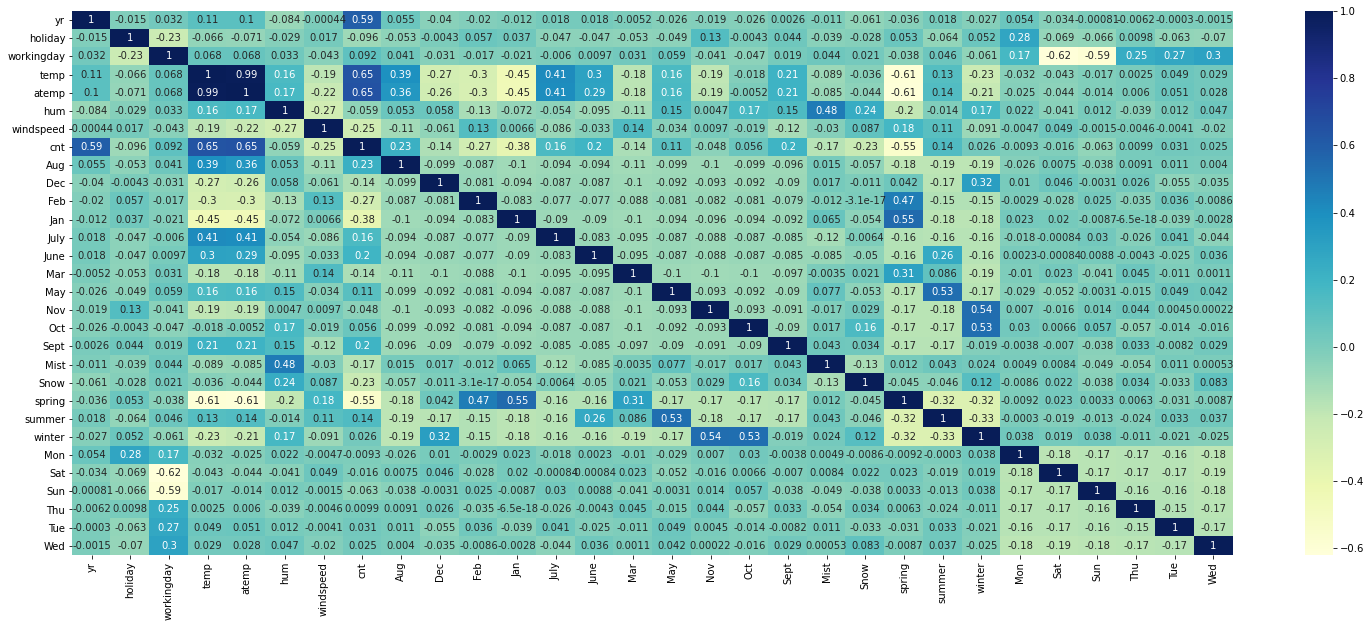

In [85]:
plt.figure(figsize=(26,20))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [143]:
y_train = df_train.pop('cnt')
X_train = df_train

In [144]:
# we are creating the model with all the columns in X_train
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.81e-180
Time:                        13:07:12   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.035      6.887      0.000       0.174       0.313
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday        0.0109      0.024      0.451      0.652      -0.037       0.058
workingday     0.0963      0.012      7.835      0.000       0.072       0.120
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
July          -0.0327      0.035     -0.931      0.352      -0.102       0.036
June           0.0060      0.025      0.241      0.810      -0.043       0.055
Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sept           0.0868      0.032      2.711      0.007       0.024       0.150
Mist          -0.0595      0.010     -5.701      0.000      -0.080      -0.039
Snow          -0.2550      0.026     -9.631      0.000      -0.307      -0.203
spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer         0.0424      0.026      1.617      0.107      -0.009       0.094
winter         0.1071      0.028      3.826      0.000       0.052       0.162
Mon           -0.0216      0.015     -1.401      0.162      -0.052       0.009
Sat            0.0952      0.014      6.910      0.000       0.068       0.122
Sun            0.0410      0.014      2.929      0.004       0.013       0.068
Thu           -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tue           -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wed           -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     7.39e+15
==============================================================================

N

In [145]:
# to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
24,Sat,19.71
25,Sun,18.34
20,spring,10.77
22,winter,9.46
21,summer,8.29
15,Nov,6.79
7,Aug,6.47


In [146]:
#droping atemp because of high Pvalue
X=X_train.drop('Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.75e-181
Time:                        13:07:46   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2441      0.033      7.380      0.000       0.179       0.309
yr             0.2325      0.008     28.824      0.000       0.217       0.248
holiday        0.0111      0.024      0.462      0.645      -0.036       0.058
workingday     0.0965      0.012      8.151      0.000       0.073       0.120
temp           0.3877      0.142      2.729      0.007       0.109       0.667
atemp          0.0588      0.138      0.425      0.671      -0.213       0.330
hum           -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed     -0.1837      0.026     -6.983      0.000      -0.235      -0.132
Aug            0.0216      0.032      0.676      0.499      -0.041       0.084
Dec           -0.0456      0.026     -1.755      0.080      -0.097       0.005
Feb           -0.0338      0.022     -1.517      0.130      -0.078       0.010
Jan           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
July          -0.0333      0.033     -0.999      0.318      -0.099       0.032
June           0.0055      0.024      0.233      0.816      -0.041       0.052
May            0.0251      0.020      1.268      0.205      -0.014       0.064
Nov           -0.0410      0.031     -1.333      0.183      -0.102       0.019
Oct            0.0065      0.031      0.213      0.831      -0.054       0.067
Sept           0.0859      0.029      2.961      0.003       0.029       0.143
Mist          -0.0595      0.010     -5.708      0.000      -0.080      -0.039
Snow          -0.2550      0.026     -9.641      0.000      -0.307      -0.203
spring        -0.0447      0.028     -1.575      0.116      -0.101       0.011
summer         0.0421      0.026      1.637      0.102      -0.008       0.093
winter         0.1074      0.027      3.910      0.000       0.053       0.161
Mon           -0.0216      0.015     -1.402      0.162      -0.052       0.009
Sat            0.0954      0.013      7.159      0.000       0.069       0.122
Sun            0.0411      0.014      3.011      0.003       0.014       0.068
Thu           -0.0097      0.016     -0.622      0.535      -0.040       0.021
Tue           -0.0184      0.016     -1.185      0.237      -0.049       0.012
Wed           -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.878
Skew:                          -0.804   Prob(JB):                     9.93e-52
Kurtosis:                       5.910   Cond. No.                     7.31e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [167]:
#vif1=pd.DataFrame()
#vif1['features']=X.columns
#vif1['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
#vif1['VIF']=round(vif1['VIF'],2)
#vif1 = vif1.sort_values(by='VIF',ascending=False)
#vif1

In [148]:
#droping Oct
X=X.drop('Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.68e-182
Time:                        13:09:59   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2455      0.032      7.586      0.000       0.182       0.309
yr             0.2325      0.008     28.873      0.000       0.217       0.248
holiday        0.0117      0.024      0.494      0.622      -0.035       0.058
workingday     0.0967      0.012      8.209      0.000       0.074       0.120
temp           0.3882      0.142      2.736      0.006       0.109       0.667
atemp          0.0589      0.138      0.427      0.670      -0.212       0.330
hum           -0.1511      0.038     -3.951      0.000      -0.226      -0.076
windspeed     -0.1835      0.026     -6.986      0.000      -0.235      -0.132
Aug            0.0190      0.029      0.644      0.520      -0.039       0.077
Dec           -0.0495      0.018     -2.687      0.007      -0.086      -0.013
Feb           -0.0349      0.022     -1.608      0.108      -0.078       0.008
Jan           -0.0657      0.022     -3.010      0.003      -0.109      -0.023
July          -0.0360      0.031     -1.161      0.246      -0.097       0.025
June           0.0043      0.023      0.187      0.852      -0.041       0.049
May            0.0246      0.020      1.253      0.211      -0.014       0.063
Nov           -0.0462      0.019     -2.426      0.016      -0.084      -0.009
Sept           0.0827      0.025      3.336      0.001       0.034       0.131
Mist          -0.0596      0.010     -5.721      0.000      -0.080      -0.039
Snow          -0.2548      0.026     -9.648      0.000      -0.307      -0.203
spring        -0.0460      0.028     -1.655      0.099      -0.101       0.009
summer         0.0400      0.024      1.684      0.093      -0.007       0.087
winter         0.1101      0.024      4.539      0.000       0.062       0.158
Mon           -0.0217      0.015     -1.408      0.160      -0.052       0.009
Sat            0.0956      0.013      7.210      0.000       0.070       0.122
Sun            0.0414      0.014      3.051      0.002       0.015       0.068
Thu           -0.0097      0.016     -0.625      0.532      -0.040       0.021
Tue           -0.0185      0.016     -1.190      0.235      -0.049       0.012
Wed           -0.0059      0.015     -0.396      0.693      -0.035       0.023
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.048
Skew:                          -0.799   Prob(JB):                     6.74e-51
Kurtosis:                       5.884   Cond. No.                     7.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-29. This might indicate

In [166]:
#vif1=pd.DataFrame()
#vif1['features']=X.columns
#vif1['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
#vif1['VIF']=round(vif1['VIF'],2)
#vif1 = vif1.sort_values(by='VIF',ascending=False)
#vif1

In [150]:
#droping June
X=X.drop('June',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.55e-183
Time:                        13:10:46   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2457      0.032      7.604      0.000       0.182       0.309
yr             0.2323      0.008     29.009      0.000       0.217       0.248
holiday        0.0114      0.024      0.483      0.630      -0.035       0.058
workingday     0.0968      0.012      8.231      0.000       0.074       0.120
temp           0.3961      0.135      2.926      0.004       0.130       0.662
atemp          0.0554      0.137      0.405      0.685      -0.213       0.324
hum           -0.1520      0.038     -4.015      0.000      -0.226      -0.078
windspeed     -0.1841      0.026     -7.081      0.000      -0.235      -0.133
Aug            0.0157      0.024      0.662      0.508      -0.031       0.062
Dec           -0.0490      0.018     -2.690      0.007      -0.085      -0.013
Feb           -0.0343      0.021     -1.599      0.110      -0.077       0.008
Jan           -0.0648      0.021     -3.045      0.002      -0.107      -0.023
July          -0.0394      0.025     -1.598      0.111      -0.088       0.009
May            0.0229      0.017      1.319      0.188      -0.011       0.057
Nov           -0.0459      0.019     -2.421      0.016      -0.083      -0.009
Sept           0.0804      0.021      3.744      0.000       0.038       0.123
Mist          -0.0595      0.010     -5.725      0.000      -0.080      -0.039
Snow          -0.2548      0.026     -9.657      0.000      -0.307      -0.203
spring        -0.0474      0.027     -1.771      0.077      -0.100       0.005
summer         0.0393      0.023      1.677      0.094      -0.007       0.085
winter         0.1086      0.023      4.756      0.000       0.064       0.153
Mon           -0.0216      0.015     -1.403      0.161      -0.052       0.009
Sat            0.0959      0.013      7.264      0.000       0.070       0.122
Sun            0.0416      0.014      3.079      0.002       0.015       0.068
Thu           -0.0097      0.016     -0.624      0.533      -0.040       0.021
Tue           -0.0185      0.016     -1.190      0.235      -0.049       0.012
Wed           -0.0058      0.015     -0.390      0.697      -0.035       0.023
==============================================================================
Omnibus:                       83.300   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.416
Skew:                          -0.798   Prob(JB):                     2.51e-50
Kurtosis:                       5.864   Cond. No.                     7.14e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [151]:
#droping Wed
X=X.drop('Wed',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.52e-184
Time:                        13:11:43   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.601      0.000       0.182       0.308
yr             0.2323      0.008     29.032      0.000       0.217       0.248
holiday        0.0099      0.023      0.423      0.672      -0.036       0.056
workingday     0.0949      0.011      8.853      0.000       0.074       0.116
temp           0.3987      0.135      2.952      0.003       0.133       0.664
atemp          0.0523      0.136      0.383      0.702      -0.216       0.320
hum           -0.1526      0.038     -4.036      0.000      -0.227      -0.078
windspeed     -0.1842      0.026     -7.091      0.000      -0.235      -0.133
Aug            0.0158      0.024      0.665      0.506      -0.031       0.062
Dec           -0.0490      0.018     -2.690      0.007      -0.085      -0.013
Feb           -0.0343      0.021     -1.600      0.110      -0.076       0.008
Jan           -0.0649      0.021     -3.053      0.002      -0.107      -0.023
July          -0.0392      0.025     -1.589      0.113      -0.088       0.009
May            0.0229      0.017      1.322      0.187      -0.011       0.057
Nov           -0.0462      0.019     -2.444      0.015      -0.083      -0.009
Sept           0.0803      0.021      3.742      0.000       0.038       0.122
Mist          -0.0592      0.010     -5.717      0.000      -0.080      -0.039
Snow          -0.2556      0.026     -9.719      0.000      -0.307      -0.204
spring        -0.0475      0.027     -1.777      0.076      -0.100       0.005
summer         0.0391      0.023      1.672      0.095      -0.007       0.085
winter         0.1087      0.023      4.762      0.000       0.064       0.153
Mon           -0.0183      0.013     -1.415      0.158      -0.044       0.007
Sat            0.0972      0.013      7.639      0.000       0.072       0.122
Sun            0.0430      0.013      3.295      0.001       0.017       0.069
Thu           -0.0064      0.013     -0.492      0.623      -0.032       0.019
Tue           -0.0152      0.013     -1.162      0.246      -0.041       0.011
==============================================================================
Omnibus:                       82.771   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.939
Skew:                          -0.793   Prob(JB):                     5.26e-50
Kurtosis:                       5.857   Cond. No.                     7.04e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [152]:
#droping atemp
X=X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.42e-185
Time:                        13:12:21   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2447      0.032      7.601      0.000       0.181       0.308
yr             0.2322      0.008     29.055      0.000       0.217       0.248
holiday        0.0092      0.023      0.398      0.691      -0.036       0.055
workingday     0.0949      0.011      8.858      0.000       0.074       0.116
temp           0.4483      0.038     11.674      0.000       0.373       0.524
hum           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed     -0.1862      0.025     -7.319      0.000      -0.236      -0.136
Aug            0.0151      0.024      0.638      0.524      -0.031       0.061
Dec           -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb           -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan           -0.0651      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0392      0.025     -1.591      0.112      -0.088       0.009
May            0.0227      0.017      1.311      0.191      -0.011       0.057
Nov           -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sept           0.0803      0.021      3.746      0.000       0.038       0.122
Mist          -0.0593      0.010     -5.730      0.000      -0.080      -0.039
Snow          -0.2563      0.026     -9.782      0.000      -0.308      -0.205
spring        -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer         0.0399      0.023      1.716      0.087      -0.006       0.086
winter         0.1095      0.023      4.830      0.000       0.065       0.154
Mon           -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat            0.0974      0.013      7.663      0.000       0.072       0.122
Sun            0.0432      0.013      3.313      0.001       0.018       0.069
Thu           -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue           -0.0150      0.013     -1.145      0.253      -0.041       0.011
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                     6.81e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [153]:
#droping holiday
X=X.drop('holiday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.42e-185
Time:                        13:12:47   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2539      0.048      5.250      0.000       0.159       0.349
yr             0.2322      0.008     29.055      0.000       0.217       0.248
workingday     0.0856      0.026      3.248      0.001       0.034       0.137
temp           0.4483      0.038     11.674      0.000       0.373       0.524
hum           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed     -0.1862      0.025     -7.319      0.000      -0.236      -0.136
Aug            0.0151      0.024      0.638      0.524      -0.031       0.061
Dec           -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb           -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan           -0.0651      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0392      0.025     -1.591      0.112      -0.088       0.009
May            0.0227      0.017      1.311      0.191      -0.011       0.057
Nov           -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sept           0.0803      0.021      3.746      0.000       0.038       0.122
Mist          -0.0593      0.010     -5.730      0.000      -0.080      -0.039
Snow          -0.2563      0.026     -9.782      0.000      -0.308      -0.205
spring        -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer         0.0399      0.023      1.716      0.087      -0.006       0.086
winter         0.1095      0.023      4.830      0.000       0.065       0.154
Mon           -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat            0.0881      0.029      3.043      0.002       0.031       0.145
Sun            0.0339      0.029      1.168      0.244      -0.023       0.091
Thu           -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue           -0.0150      0.013     -1.145      0.253      -0.041       0.011
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
#droping Aug
X=X.drop('Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.59e-186
Time:                        13:13:07   Log-Likelihood:                 526.71
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -910.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2621      0.047      5.623      0.000       0.171       0.354
yr             0.2324      0.008     29.106      0.000       0.217       0.248
workingday     0.0859      0.026      3.261      0.001       0.034       0.138
temp           0.4501      0.038     11.757      0.000       0.375       0.525
hum           -0.1507      0.038     -4.003      0.000      -0.225      -0.077
windspeed     -0.1864      0.025     -7.330      0.000      -0.236      -0.136
Dec           -0.0497      0.018     -2.737      0.006      -0.085      -0.014
Feb           -0.0344      0.021     -1.604      0.109      -0.076       0.008
Jan           -0.0651      0.021     -3.068      0.002      -0.107      -0.023
July          -0.0499      0.018     -2.775      0.006      -0.085      -0.015
May            0.0223      0.017      1.293      0.197      -0.012       0.056
Nov           -0.0472      0.019     -2.504      0.013      -0.084      -0.010
Sept           0.0717      0.017      4.307      0.000       0.039       0.104
Mist          -0.0591      0.010     -5.715      0.000      -0.079      -0.039
Snow          -0.2571      0.026     -9.831      0.000      -0.308      -0.206
spring        -0.0564      0.022     -2.574      0.010      -0.099      -0.013
summer         0.0297      0.017      1.759      0.079      -0.003       0.063
winter         0.1006      0.018      5.641      0.000       0.066       0.136
Mon           -0.0181      0.013     -1.400      0.162      -0.043       0.007
Sat            0.0887      0.029      3.066      0.002       0.032       0.146
Sun            0.0341      0.029      1.173      0.241      -0.023       0.091
Thu           -0.0062      0.013     -0.476      0.634      -0.032       0.019
Tue           -0.0148      0.013     -1.136      0.257      -0.041       0.011
==============================================================================
Omnibus:                       83.376   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.263
Skew:                          -0.799   Prob(JB):                     2.71e-50
Kurtosis:                       5.861   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
#droping Thu
X=X.drop('Thu',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.47e-187
Time:                        13:28:16   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2594      0.046      5.611      0.000       0.169       0.350
yr             0.2324      0.008     29.128      0.000       0.217       0.248
workingday     0.0863      0.026      3.282      0.001       0.035       0.138
temp           0.4502      0.038     11.769      0.000       0.375       0.525
hum           -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed     -0.1864      0.025     -7.338      0.000      -0.236      -0.137
Dec           -0.0500      0.018     -2.758      0.006      -0.086      -0.014
Feb           -0.0340      0.021     -1.591      0.112      -0.076       0.008
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0498      0.018     -2.770      0.006      -0.085      -0.014
May            0.0224      0.017      1.299      0.195      -0.012       0.056
Nov           -0.0476      0.019     -2.534      0.012      -0.085      -0.011
Sept           0.0716      0.017      4.303      0.000       0.039       0.104
Mist          -0.0588      0.010     -5.703      0.000      -0.079      -0.039
Snow          -0.2573      0.026     -9.847      0.000      -0.309      -0.206
spring        -0.0564      0.022     -2.576      0.010      -0.099      -0.013
summer         0.0298      0.017      1.766      0.078      -0.003       0.063
winter         0.1009      0.018      5.663      0.000       0.066       0.136
Mon           -0.0160      0.012     -1.317      0.188      -0.040       0.008
Sat            0.0911      0.028      3.201      0.001       0.035       0.147
Sun            0.0364      0.029      1.275      0.203      -0.020       0.093
Tue           -0.0129      0.012     -1.040      0.299      -0.037       0.011
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
vif1=pd.DataFrame()
vif1['features']=X.columns
vif1['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1 = vif1.sort_values(by='VIF',ascending=False)
vif1

,features,VIF
3,hum,35.48
2,temp,22.61
1,workingday,19.86
14,spring,6.09
18,Sat,5.52
19,Sun,5.30
4,windspeed,5.09
16,winter,4.45
15,summer,3.76
7,Jan,2.43


In [157]:
#droping hum as VIF is greater than 5
X=X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          5.21e-185
Time:                        13:29:33   Log-Likelihood:                 518.36
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     489   BIC:                            -905.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1898      0.043      4.365      0.000       0.104       0.275
yr             0.2360      0.008     29.329      0.000       0.220       0.252
workingday     0.0861      0.027      3.223      0.001       0.034       0.139
temp           0.4130      0.038     10.963      0.000       0.339       0.487
windspeed     -0.1597      0.025     -6.418      0.000      -0.209      -0.111
Dec           -0.0573      0.018     -3.127      0.002      -0.093      -0.021
Feb           -0.0360      0.022     -1.659      0.098      -0.079       0.007
Jan           -0.0719      0.021     -3.352      0.001      -0.114      -0.030
July          -0.0448      0.018     -2.463      0.014      -0.081      -0.009
May            0.0138      0.017      0.795      0.427      -0.020       0.048
Nov           -0.0484      0.019     -2.538      0.011      -0.086      -0.011
Sept           0.0651      0.017      3.875      0.000       0.032       0.098
Mist          -0.0826      0.009     -9.639      0.000      -0.099      -0.066
Snow          -0.3000      0.024    -12.389      0.000      -0.348      -0.252
spring        -0.0634      0.022     -2.863      0.004      -0.107      -0.020
summer         0.0266      0.017      1.551      0.122      -0.007       0.060
winter         0.0881      0.018      4.953      0.000       0.053       0.123
Mon           -0.0187      0.012     -1.513      0.131      -0.043       0.006
Sat            0.0915      0.029      3.168      0.002       0.035       0.148
Sun            0.0323      0.029      1.114      0.266      -0.025       0.089
Tue           -0.0146      0.013     -1.158      0.248      -0.039       0.010
==============================================================================
Omnibus:                       86.205   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.631
Skew:                          -0.822   Prob(JB):                     1.52e-52
Kurtosis:                       5.920   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
vif1=pd.DataFrame()
vif1['features']=X.columns
vif1['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1 = vif1.sort_values(by='VIF',ascending=False)
vif1

,features,VIF
1,workingday,18.02
2,temp,14.83
13,spring,5.53
17,Sat,5.09
3,windspeed,4.95
18,Sun,4.75
15,winter,3.85
14,summer,3.51
6,Jan,2.33
0,yr,2.10


In [159]:
#droping workingday as VIF is greater than 5
X=X.drop('workingday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          7.18e-184
Time:                        13:30:22   Log-Likelihood:                 513.00
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     490   BIC:                            -901.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2801      0.034      8.336      0.000       0.214       0.346
yr             0.2369      0.008     29.177      0.000       0.221       0.253
temp           0.4075      0.038     10.726      0.000       0.333       0.482
windspeed     -0.1611      0.025     -6.415      0.000      -0.210      -0.112
Dec           -0.0595      0.018     -3.222      0.001      -0.096      -0.023
Feb           -0.0401      0.022     -1.834      0.067      -0.083       0.003
Jan           -0.0750      0.022     -3.467      0.001      -0.118      -0.033
July          -0.0439      0.018     -2.392      0.017      -0.080      -0.008
May            0.0148      0.018      0.841      0.401      -0.020       0.049
Nov           -0.0569      0.019     -2.980      0.003      -0.094      -0.019
Sept           0.0610      0.017      3.607      0.000       0.028       0.094
Mist          -0.0812      0.009     -9.406      0.000      -0.098      -0.064
Snow          -0.2972      0.024    -12.164      0.000      -0.345      -0.249
spring        -0.0664      0.022     -2.972      0.003      -0.110      -0.022
summer         0.0251      0.017      1.453      0.147      -0.009       0.059
winter         0.0873      0.018      4.862      0.000       0.052       0.123
Mon           -0.0287      0.012     -2.379      0.018      -0.052      -0.005
Sat            0.0066      0.012      0.550      0.583      -0.017       0.030
Sun           -0.0525      0.012     -4.254      0.000      -0.077      -0.028
Tue           -0.0134      0.013     -1.056      0.292      -0.038       0.012
==============================================================================
Omnibus:                      100.216   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.395
Skew:                          -0.926   Prob(JB):                     9.71e-66
Kurtosis:                       6.265   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
#droping Sat as p value is greater than 0.5
X=X.drop('Sat',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          6.76e-185
Time:                        13:31:00   Log-Likelihood:                 512.84
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     491   BIC:                            -907.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2820      0.033      8.442      0.000       0.216       0.348
yr             0.2368      0.008     29.193      0.000       0.221       0.253
temp           0.4069      0.038     10.723      0.000       0.332       0.481
windspeed     -0.1605      0.025     -6.401      0.000      -0.210      -0.111
Dec           -0.0595      0.018     -3.225      0.001      -0.096      -0.023
Feb           -0.0404      0.022     -1.850      0.065      -0.083       0.003
Jan           -0.0751      0.022     -3.473      0.001      -0.118      -0.033
July          -0.0436      0.018     -2.376      0.018      -0.080      -0.008
May            0.0144      0.018      0.820      0.413      -0.020       0.049
Nov           -0.0573      0.019     -3.006      0.003      -0.095      -0.020
Sept           0.0610      0.017      3.606      0.000       0.028       0.094
Mist          -0.0812      0.009     -9.413      0.000      -0.098      -0.064
Snow          -0.2973      0.024    -12.180      0.000      -0.345      -0.249
spring        -0.0664      0.022     -2.972      0.003      -0.110      -0.022
summer         0.0252      0.017      1.461      0.145      -0.009       0.059
winter         0.0876      0.018      4.884      0.000       0.052       0.123
Mon           -0.0305      0.012     -2.627      0.009      -0.053      -0.008
Sun           -0.0543      0.012     -4.565      0.000      -0.078      -0.031
Tue           -0.0152      0.012     -1.233      0.218      -0.039       0.009
==============================================================================
Omnibus:                       98.499   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.131
Skew:                          -0.907   Prob(JB):                     3.01e-65
Kurtosis:                       6.270   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
vif1=pd.DataFrame()
vif1['features']=X.columns
vif1['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1 = vif1.sort_values(by='VIF',ascending=False)
vif1

,features,VIF
1,temp,5.53
2,windspeed,4.78
12,spring,4.36
14,winter,3.07
13,summer,2.83
5,Jan,2.21
0,yr,2.09
4,Feb,1.89
8,Nov,1.80
6,July,1.61


In [162]:
#droping temp as VIF is greater than 5
X=X.drop('temp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     121.5
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.15e-163
Time:                        13:38:36   Log-Likelihood:                 459.18
No. Observations:                 510   AIC:                            -882.4
Df Residuals:                     492   BIC:                            -806.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6062      0.016     38.513      0.000       0.575       0.637
yr             0.2480      0.009     27.780      0.000       0.230       0.266
windspeed     -0.1842      0.028     -6.644      0.000      -0.239      -0.130
Dec           -0.1317      0.019     -6.902      0.000      -0.169      -0.094
Feb           -0.1006      0.023     -4.291      0.000      -0.147      -0.055
Jan           -0.1671      0.022     -7.588      0.000      -0.210      -0.124
July          -0.0146      0.020     -0.724      0.469      -0.054       0.025
May            0.0544      0.019      2.863      0.004       0.017       0.092
Nov           -0.1170      0.020     -5.787      0.000      -0.157      -0.077
Sept           0.0459      0.019      2.454      0.014       0.009       0.083
Mist          -0.0886      0.010     -9.273      0.000      -0.107      -0.070
Snow          -0.3157      0.027    -11.681      0.000      -0.369      -0.263
spring        -0.2056      0.020    -10.203      0.000      -0.245      -0.166
summer        -0.0676      0.017     -4.077      0.000      -0.100      -0.035
winter        -0.0102      0.017     -0.597      0.551      -0.044       0.023
Mon           -0.0334      0.013     -2.591      0.010      -0.059      -0.008
Sun           -0.0565      0.013     -4.280      0.000      -0.082      -0.031
Tue           -0.0144      0.014     -1.053      0.293      -0.041       0.012
==============================================================================
Omnibus:                       87.836   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.673
Skew:                          -0.818   Prob(JB):                     1.11e-56
Kurtosis:                       6.074   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
#droping winter as p value is greater than 0.5
X=X.drop('winter',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.19e-164
Time:                        13:39:20   Log-Likelihood:                 459.00
No. Observations:                 510   AIC:                            -884.0
Df Residuals:                     493   BIC:                            -812.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6021      0.014     42.507      0.000       0.574       0.630
yr             0.2481      0.009     27.813      0.000       0.231       0.266
windspeed     -0.1847      0.028     -6.668      0.000      -0.239      -0.130
Dec           -0.1360      0.018     -7.735      0.000      -0.171      -0.101
Feb           -0.1018      0.023     -4.360      0.000      -0.148      -0.056
Jan           -0.1684      0.022     -7.688      0.000      -0.211      -0.125
July          -0.0101      0.019     -0.542      0.588      -0.047       0.027
May            0.0544      0.019      2.862      0.004       0.017       0.092
Nov           -0.1227      0.018     -6.881      0.000      -0.158      -0.088
Sept           0.0481      0.018      2.631      0.009       0.012       0.084
Mist          -0.0889      0.010     -9.325      0.000      -0.108      -0.070
Snow          -0.3176      0.027    -11.848      0.000      -0.370      -0.265
spring        -0.1999      0.018    -11.306      0.000      -0.235      -0.165
summer        -0.0631      0.015     -4.280      0.000      -0.092      -0.034
Mon           -0.0338      0.013     -2.626      0.009      -0.059      -0.009
Sun           -0.0570      0.013     -4.335      0.000      -0.083      -0.031
Tue           -0.0146      0.014     -1.069      0.286      -0.041       0.012
==============================================================================
Omnibus:                       90.401   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.258
Skew:                          -0.835   Prob(JB):                     2.06e-59
Kurtosis:                       6.151   Cond. No.                         9.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
#droping july as pvalue is greater than 0.5
X=X.drop('July',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     138.0
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.15e-165
Time:                        13:39:39   Log-Likelihood:                 458.85
No. Observations:                 510   AIC:                            -885.7
Df Residuals:                     494   BIC:                            -817.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5993      0.013     45.453      0.000       0.573       0.625
yr             0.2481      0.009     27.835      0.000       0.231       0.266
windspeed     -0.1844      0.028     -6.665      0.000      -0.239      -0.130
Dec           -0.1341      0.017     -7.793      0.000      -0.168      -0.100
Feb           -0.1012      0.023     -4.344      0.000      -0.147      -0.055
Jan           -0.1679      0.022     -7.677      0.000      -0.211      -0.125
May            0.0544      0.019      2.864      0.004       0.017       0.092
Nov           -0.1201      0.017     -6.993      0.000      -0.154      -0.086
Sept           0.0507      0.018      2.866      0.004       0.016       0.085
Mist          -0.0884      0.009     -9.322      0.000      -0.107      -0.070
Snow          -0.3170      0.027    -11.844      0.000      -0.370      -0.264
spring        -0.1979      0.017    -11.454      0.000      -0.232      -0.164
summer        -0.0605      0.014     -4.337      0.000      -0.088      -0.033
Mon           -0.0337      0.013     -2.623      0.009      -0.059      -0.008
Sun           -0.0572      0.013     -4.350      0.000      -0.083      -0.031
Tue           -0.0148      0.014     -1.090      0.276      -0.042       0.012
==============================================================================
Omnibus:                       89.625   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.208
Skew:                          -0.833   Prob(JB):                     4.25e-58
Kurtosis:                       6.108   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
vif1=pd.DataFrame()
vif1['features']=X.columns
vif1['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1 = vif1.sort_values(by='VIF',ascending=False)
vif1

,features,VIF
10,spring,3.64
1,windspeed,3.42
11,summer,2.32
4,Jan,2.13
3,Feb,1.85
0,yr,1.79
5,May,1.54
8,Mist,1.49
6,Nov,1.22
12,Mon,1.22


# Residual Analysis

<AxesSubplot:ylabel='Density'>

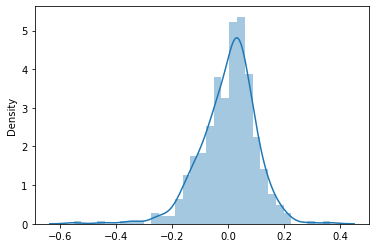

In [168]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

In [170]:
num_var=['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_var] = scaler.transform(df_test[num_var])
df_test[num_var].describe()


,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


In [172]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Snow,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.027273,0.254545,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.163248,0.436599,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_test=X_test.drop([],axis=1)

In [175]:
X_test_sm = sm.add_constant(X_test)
X_test_sm=X_test_sm.drop(['Mar','Oct','June','Wed','atemp','holiday','Aug','Thu','hum','workingday','Sat','temp','winter','July'],axis=1)
y_test_pred = lr_model.predict(X_test_sm)

In [176]:
print(y_test_pred)

184    0.461745
535    0.758575
299    0.449347
221    0.536728
152    0.439704
         ...   
702    0.646258
127    0.523205
640    0.749482
72     0.330278
653    0.777156
Length: 220, dtype: float64


In [177]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7967698054125981